In [2]:
import tensorflow as tf
import numpy
from matplotlib import image
from matplotlib import pyplot
%matplotlib inline


In [15]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


http://localhost:8888/notebooks/Documenti/TESI/thesis/codici/Prove%20TF.ipynb#Prova-cose-base

http://localhost:8888/notebooks/Documenti/TESI/thesis/codici/Prove%20TF.ipynb#Prova-arrays

http://localhost:8888/notebooks/Documenti/TESI/thesis/codici/Prove%20TF.ipynb#Riproduco-cose-fatte-con-numpy

http://localhost:8888/notebooks/Documenti/TESI/thesis/codici/Prove%20TF.ipynb#Prove-assegnazione-e-indexing

http://localhost:8888/notebooks/Documenti/TESI/thesis/codici/Prove%20TF.ipynb#Prova-convolution

## Prova cose base

In [2]:
#basic python
x = 35
y = x + 5
print(y)

40


In [17]:
#basic TF

#x = tf.random_uniform([1, 2], -1.0, 1.0)
x = tf.constant(35, name = 'x')
y = tf.Variable(x+5, name = 'y')


model = tf.global_variables_initializer()

sess = tf.Session()
sess.run(model)

print(sess.run(y))

#per scrivere il grafo
#writer = tf.summary.FileWriter("output", sess.graph)
print(sess.run(y))
#writer.close

40
40


In [4]:

a = tf.add(1, 2,)
b = tf.multiply(a, 3)
c = tf.add(4, 5,)
d = tf.multiply(c, 6,)
e = tf.multiply(4, 5,)
f = tf.div(c, 6,)
g = tf.add(b, d)
h = tf.multiply(g, f)

primo = tf.constant(3, name = 'primo')
secondo = tf.constant(5, name = 'secondo')
somma1 = primo + secondo
somma2 = tf.add(primo, secondo)

sess = tf.Session()

#writer = tf.summary.FileWriter("output", sess.graph)
print(sess.run(h))
%time print(sess.run(somma1))
%time print(sess.run(somma2))

#writer.close


63
8
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 803 µs
8
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 605 µs


In [2]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))


[[ 22.  28.]
 [ 49.  64.]]


## Prova arrays



In [2]:
primo = tf.constant([[10,20,30], [100,200,300]], name = 'primo')

righe = tf.constant([1,2,3], name = 'secondo1')
colonne = tf.constant([[1],[2]], name = 'secondo2')
somma1 = primo + righe
somma2 = tf.add(primo, colonne)

sessione = tf.Session()

#writer = tf.summary.FileWriter("output", sess.graph)
print(sessione.run(somma1))
print(sessione.run(somma2))

print("dimensioni dei tre tensori")
print(primo.shape,
righe.shape,
colonne.shape)
print(primo)

[[ 11  22  33]
 [101 202 303]]
[[ 11  21  31]
 [102 202 302]]
dimensioni dei tre tensori
(2, 3) (3,) (2, 1)
Tensor("primo:0", shape=(2, 3), dtype=int32)


In [8]:
# First, load the image
filename = "MarshOrchid.jpg"
img = tf.constant(image.imread(filename))
# Print out its shape
sessione = tf.Session()
numpimg = sessione.run(img)

pyplot.imshow(numpimg)
pyplot.show()

print(numpimg.size)

# immagine è resa come un array (non è chiaro se di numpy o di python)

61112040


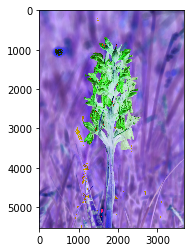

In [10]:

alterazione = tf.constant([5,5,0], name='blur')
tensoreImg = tf.Variable(img+alterazione, name='x')

#print(tensoreImg)

model = tf.global_variables_initializer()

sess = tf.Session()
sess.run(model)

sess.run(tensoreImg)
img = tensoreImg.eval(session = sess)
img = img.astype(float)
#print(img)
pyplot.imshow(img)
#pyplot.show()

## Riproduco cose fatte con numpy

### Inizializzazioni matrici costanti

In [2]:


# non ho ben capito cosa è Variable
#unitensor = tf.Variable(tf.ones((10,10)))
unitensor = tf.Variable(tf.ones((10,10)))
unitensor2 = tf.ones((10,10))
unitensor3 = tf.constant(1, shape=(10,10))

tritensor = tf.constant(3, shape=(10,10))
tritensor2 = tf.Variable(unitensor3*3)

init = tf.global_variables_initializer()

sessione = tf.Session()
sessione.run(init)

#print(sessione.run(unitensor))
#print(sessione.run(unitensor2))
print(sessione.run(unitensor3))
print(sessione.run(tritensor))
print(sessione.run(tritensor2))

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
[[3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]]
[[3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]]


### Inizializzazioni ranges e reshaping

In [117]:
rangetensor = tf.range(0, limit = 9, delta = 1)
rangeMatrTensor = tf.reshape(rangetensor, (3,3))
#transposeTensor = tf.transpose(rangetensor, perm=[1])
reshapeTensor = tf.reshape(rangetensor,(9,1))



init = tf.global_variables_initializer()

sessione = tf.Session()
sessione.run(init)

print(sessione.run(rangetensor))
print(sessione.run(rangeMatrTensor))
#print(sessione.run(transposeTensor))
print(sessione.run(reshapeTensor))
print(sessione.run(tf.ones(10, dtype = tf.int32)))


[0 1 2 3 4 5 6 7 8]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
[1 1 1 1 1 1 1 1 1 1]


### Operazioni matriciali elementwise (somma, prodotto)

In [15]:
#tf.add #addizioni
#tf.subtract #sottrazioni
#tf.multiply #moltiplizazioni
#tf.scalar_mul(scalar, tensor) #aggiunge uno scalare a tutto il tensore
#tf.div #divisioni WARNING FORSE tf.divide È DIVERSO!
#tf.truediv #divisioni restituendo sempre float


unitensor = tf.ones((3,3))
duitensor = tf.constant(2.0, shape=(3,3))
sommatensor1 = tf.add(unitensor,duitensor)
sommatensor2 = tf.Variable(unitensor+duitensor)
init = tf.global_variables_initializer()

sessione = tf.Session()
sessione.run(init)

print(sessione.run(sommatensor1))
print(sessione.run(sommatensor2))

rangetensor = tf.range(0.0, limit = 9, delta = 1)
rangetensor = tf.reshape(rangetensor, (3,3))

prodottotensor1 = tf.multiply(rangetensor,duitensor)
# con variabile, non è esattamente la stessa cosa
prodottotensor2 = tf.Variable(rangetensor*duitensor)
init = tf.global_variables_initializer()

sessione = tf.Session()
sessione.run(init)

print(sessione.run(prodottotensor1))
print(sessione.run(prodottotensor2))

# le operazioni + e * lavorano elementwise come numpy, ma * può lavorare come prodotto scalare


[[ 3.  3.  3.]
 [ 3.  3.  3.]
 [ 3.  3.  3.]]
[[ 3.  3.  3.]
 [ 3.  3.  3.]
 [ 3.  3.  3.]]
[[  0.   2.   4.]
 [  6.   8.  10.]
 [ 12.  14.  16.]]
[[  0.   2.   4.]
 [  6.   8.  10.]
 [ 12.  14.  16.]]


Altre operazioni matematiche:  
https://www.tensorflow.org/api_guides/python/math_ops#Arithmetic_Operators  
https://www.tensorflow.org/api_guides/python/math_ops#Basic_Math_Functions  


### Operazioni matriciali: prodotto esterno, kronecker, righe x colonne, inversa, trasposta

In [84]:
#faccio prodotto vettoriale tra due vettori per ottenere matrice 2d,  e poi faccio hack per ottenere matrice 3d
prodotto1 = tf.Variable(rangetensor*reshapeTensor)
#prodotto1 = tf.reshape(prodotto1, (81,1))
prodotto1bis = tf.multiply(rangetensor,reshapeTensor)
prodotto2 = tf.Variable(reshapeTensor*rangetensor)
prodotto2bis = tf.multiply(reshapeTensor, rangetensor)

#prodotto3d = tf.multiply(rangetensor,prodotto1) #che output dà questo comando?
#prodotto3d = tf.multiply(prodotto1, reshapeTensor) #è commutativo e dà stesso risultato sia che vettore sia 
                                                   #verticale che orizzontale!
#prodotto3d = tf.multiply(rangetensor, prodotto1)
#prodotto3d = tf.reshape(prodotto3d, (9,9,9))
    
init = tf.global_variables_initializer()

sessione = tf.Session()
sessione.run(init)

def outer3d(vettore, matrice):
    shape = tf.shape(matrice)
    matrice = tf.reshape(matrice, (tf.size(matrice),1))
    prodotto3d = tf.multiply(vettore, matrice)
    return tf.reshape(prodotto3d, (shape[0],shape[1],tf.size(vettore)))

prodottoFunzione = outer3d(rangetensor,prodotto1)

#print(sessione.run(prodotto3d))
print(sessione.run(prodottoFunzione))






[[[  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]]

 [[  0   0   0   0   0   0   0   0   0]
  [  0   1   2   3   4   5   6   7   8]
  [  0   2   4   6   8  10  12  14  16]
  [  0   3   6   9  12  15  18  21  24]
  [  0   4   8  12  16  20  24  28  32]
  [  0   5  10  15  20  25  30  35  40]
  [  0   6  12  18  24  30  36  42  48]
  [  0   7  14  21  28  35  42  49  56]
  [  0   8  16  24  32  40  48  56  64]]

 [[  0   0   0   0   0   0   0   0   0]
  [  0   2   4   6   8  10  12  14  16]
  [  0   4   8  12  16  20  24  28  32]
  [  0   6  12  18  24  30  36  42  48]
  [  0   8  16  24  32  40  48  56  64]
  [  0  10  20  30  40  50  60  70  80]
  [  0  12  24  36  48  60  72  84  

In [63]:
#prodotti matriciali
unitensor = tf.ones((3,3))
rangetensor = tf.range(0.0, limit = 9)
rangetensor = tf.reshape(rangetensor, (3,3))


tensorMatrProd = tf.matmul(rangetensor, rangetensor)
tensorProd = tf.tensordot(rangetensor,rangetensor, 1)
# sono equivalenti, se si fa il tensordot con asse 2 esce
# uno scalare che non capisco


sessione = tf.Session()

print(sessione.run(tensorMatrProd))
print(sessione.run(tensorProd))
print(sessione.run(tf.transpose(tensorProd)))


[[  15.   18.   21.]
 [  42.   54.   66.]
 [  69.   90.  111.]]
[[  15.   18.   21.]
 [  42.   54.   66.]
 [  69.   90.  111.]]
[[  15.   42.   69.]
 [  18.   54.   90.]
 [  21.   66.  111.]]


In [23]:
#tf.transpose #trasposta
#tf.reshape(rangetensor,(10,1)) #vettore trasposto
#tf.matrix_transpose #traposto di ultime due dimensioni un tensore di rango >=2
#tf.matrix_inverse #matrice inversa di quadrata, invertibile

tensoruni = tf.ones(10.0)
tensorzeri = tf.zeros(10.0)
tensorscala = tf.range(10.0)

colonne = tf.constant(10)

#prodotto scalare
tensorScalar = tf.tensordot(tensoruni,tensorscala, 1)

#trasposto
tensorTrasposto = tf.reshape(tensorscala,(10,1))

#outer: NB tensorFlow broadcasta automaticamente 
tensorOuter = tensoruni*tensorTrasposto

sessione = tf.Session()

print(sessione.run(tensoruni), sessione.run(tensorzeri))
print(sessione.run(tf.zeros([colonne])))
print(sessione.run(tensorScalar))
print(sessione.run(tensorscala))
print(sessione.run(tensorTrasposto))
print(sessione.run(tensorOuter))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
45.0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.  8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.  9.  9.  9.  9.  9.]]


Tutte le operazioni matriciali:  
https://www.tensorflow.org/api_guides/python/math_ops#Matrix_Math_Functions  
https://www.tensorflow.org/api_docs/python/tf/tensordot (prodotto per contrazione di un indice)


## Prove assegnazione e indexing

In [14]:
array = tf.Variable(tf.range(10,20))
indici = tf.constant([1,3,5])
updati = tf.constant([100,90,4050])

slicearray = tf.gather(array,indici)

updarray = tf.scatter_update(array,indici,updati)

init = tf.global_variables_initializer()
sessione = tf.Session()
sessione.run(init)


print(sessione.run(array[0:4]))
print(sessione.run(slicearray))
print(sessione.run(array))
print(sessione.run(updarray))

[10 11 12 13]
[11 13 15]
[10 11 12 13 14 15 16 17 18 19]
[  10  100   12   90   14 4050   16   17   18   19]


In [7]:
# selezione nonzero elements



    #vettore = tf.constant([1,0,0,2,0], dtype=tf.int64)
    ravettore = tf.random_uniform((1,100000000),0,2,dtype = tf.int32)
    ravettore = ravettore[0]

    where = tf.not_equal(ravettore, 0)
    indici = tf.where(where)
    nonzeri = tf.gather(ravettore,indici)

    #OPPURE
    #sparso = tf.SparseTensor(indici, nonzeri, dense_shape=vettore.get_shape())


sessione = tf.Session(config=tf.ConfigProto(log_device_placement=True))

%time sessione.run(nonzeri)
#print(shape,sessione.run(shape))
#print(sessione.run(ravettore))
#%time print(sessione.run(indici))
#%time print(sessione.run(nonzeri))
#%time sessione.run(ravettore)
#%time sessione.run(indici)


#print(sessione.run(sparso))



InvalidArgumentError: Cannot assign a device for operation 'random_uniform_3': Operation was explicitly assigned to /device:GPU:2 but available devices are [ /job:localhost/replica:0/task:0/cpu:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: random_uniform_3 = RandomUniformInt[T=DT_INT32, Tout=DT_INT32, seed=0, seed2=0, _device="/device:GPU:2"](random_uniform_3/shape, random_uniform_3/min, random_uniform_3/max)]]

Caused by op 'random_uniform_3', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/protoss/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/protoss/.local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/protoss/.local/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/protoss/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/protoss/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/protoss/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/protoss/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/protoss/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/protoss/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/protoss/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/protoss/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-70a82cc0c674>", line 6, in <module>
    ravettore = tf.random_uniform((1,100000000),0,2,dtype = tf.int32)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/ops/random_ops.py", line 233, in random_uniform
    shape, minval, maxval, seed=seed1, seed2=seed2, name=name)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/ops/gen_random_ops.py", line 287, in _random_uniform_int
    seed2=seed2, name=name)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'random_uniform_3': Operation was explicitly assigned to /device:GPU:2 but available devices are [ /job:localhost/replica:0/task:0/cpu:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: random_uniform_3 = RandomUniformInt[T=DT_INT32, Tout=DT_INT32, seed=0, seed2=0, _device="/device:GPU:2"](random_uniform_3/shape, random_uniform_3/min, random_uniform_3/max)]]


In [9]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

nomi = get_available_gpus()

print(nomi)

[]


In [108]:
# prova map
sessione = tf.Session()
moltiplicatore = tf.range(10)
addizionatore = tf.range(100,110)

def mappalo(stepIesimo):
    uni = tf.range(10)
    moltiplicato = tf.multiply(moltiplicatore[stepIesimo],uni)
    addizionato = moltiplicato + addizionatore
    return addizionato

image = tf.map_fn(mappalo, tf.range(0, 10), dtype=tf.int32)

print(sessione.run(image))

[[100 101 102 103 104 105 106 107 108 109]
 [100 102 104 106 108 110 112 114 116 118]
 [100 103 106 109 112 115 118 121 124 127]
 [100 104 108 112 116 120 124 128 132 136]
 [100 105 110 115 120 125 130 135 140 145]
 [100 106 112 118 124 130 136 142 148 154]
 [100 107 114 121 128 135 142 149 156 163]
 [100 108 116 124 132 140 148 156 164 172]
 [100 109 118 127 136 145 154 163 172 181]
 [100 110 120 130 140 150 160 170 180 190]]


In [18]:
#prova map con prodotto scalare
import numpy
from scipy import sparse
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.python.client import timeline
import time

nRows = 10
def mapfunc(ithStep):
    matrix1 = tf.zeros([1000,1000], dtype = tf.float32)
    matrix2 = tf.ones([1000,1000], dtype = tf.float32)
    matrix1 = tf.add(matrix1,ithStep)
    prodotto = tf.matmul(matrix1,matrix2)
    return prodotto
    
sessione = tf.Session(config=tf.ConfigProto(log_device_placement=True))

imageMapped = tf.map_fn(mapfunc, tf.range(0,nRows), dtype = tf.float32)

run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
run_metadata = tf.RunMetadata()

start = time.time()
image = sessione.run(imageMapped, options=run_options, run_metadata=run_metadata)
stop = time.time()
print(stop-start)


    # Create the Timeline object, and write it to a json
tl = timeline.Timeline(run_metadata.step_stats)
ctf = tl.generate_chrome_trace_format()
with open('timelineDB.json', 'w') as f:
	f.write(ctf)

0.7225027084350586


In [19]:
#prova prodotto scalare
import numpy
import tensorflow as tf
from tensorflow.python.client import timeline

matrix1 = tf.zeros([5000,5000], dtype = tf.int32)
matrix2 = tf.ones([5000,5000], dtype = tf.int32)
matrix1 = tf.add(matrix1,2)
product = tf.matmul(matrix1,matrix2)
    
session = tf.Session(config=tf.ConfigProto(log_device_placement=True))

run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
run_metadata = tf.RunMetadata()

image = session.run(product, options=run_options, run_metadata=run_metadata)


    # Create the Timeline object, and write it to a json
tl = timeline.Timeline(run_metadata.step_stats)
ctf = tl.generate_chrome_trace_format()
with open('timelineDB.json', 'w') as f:
	f.write(ctf)

16.25399613380432


In [1]:
#prova histogram fixed
import numpy
import tensorflow as tf
from tensorflow.python.client import timeline

matrix1 = tf.random_uniform((5000,5000),0,2,dtype = tf.int32)
matrix2 = tf.ones([5000,5000], dtype = tf.int32)
matrix1 = tf.add(matrix1,2)
product = tf.matmul(matrix1,matrix2)
    
session = tf.Session(config=tf.ConfigProto(log_device_placement=True))

run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
run_metadata = tf.RunMetadata()

image = session.run(product, options=run_options, run_metadata=run_metadata)


    # Create the Timeline object, and write it to a json
tl = timeline.Timeline(run_metadata.step_stats)
ctf = tl.generate_chrome_trace_format()
with open('timelineDB.json', 'w') as f:
	f.write(ctf)

## Prova map con passaggio di più variabili

In [39]:
import numpy
import tensorflow as tf
sessione = tf.Session()

array = tf.range(0.0,100.0)

cosaImportante1 = tf.range(0.0,2.0)
cosaImportante2 = tf.constant([2.0])
tutto = tf.concat((cosaImportante1, cosaImportante2, array),0)

def funsione(i):
    j = i+3
    funsionalo = tutto[2] + tutto[j]
    
    return funsionalo

mappa = tf.map_fn(funsione, tf.range(0,tf.size(tutto)-3), dtype=tf.float32)

print(sessione.run(tf.size(mappa)))


Tensor("concat_8:0", shape=(103,), dtype=float32)
100



## Prova convolution

In [134]:
import numpy
import tensorflow as tf
sessione = tf.Session()


array = tf.range(0.0,8160000.0)
array = tf.reshape(array, (85,96000))
kernel = tf.constant([[-1.0,0.0,0.0,1.0]])

array = tf.reshape(array,(1,85,96000,1))
kernel = tf.reshape(kernel, (1,4,1,1))

somma = tf.nn.conv2d(input=array,filter=kernel,strides=[1,1,1,1],padding ='SAME')
somma = tf.reshape(somma, (85,96000))
#somma = tf.reshape(somma, (85,95997))
#print(sessione.run(kernel))
#print(sessione.run(array))
print(sessione.run(somma))

[[  2.00000000e+00   3.00000000e+00   3.00000000e+00 ...,   3.00000000e+00
   -9.59970000e+04  -9.59980000e+04]
 [  9.60020000e+04   3.00000000e+00   3.00000000e+00 ...,   3.00000000e+00
   -1.91997000e+05  -1.91998000e+05]
 [  1.92002000e+05   3.00000000e+00   3.00000000e+00 ...,   3.00000000e+00
   -2.87997000e+05  -2.87998000e+05]
 ..., 
 [  7.87200200e+06   3.00000000e+00   3.00000000e+00 ...,   3.00000000e+00
   -7.96799700e+06  -7.96799800e+06]
 [  7.96800200e+06   3.00000000e+00   3.00000000e+00 ...,   3.00000000e+00
   -8.06399700e+06  -8.06399800e+06]
 [  8.06400200e+06   3.00000000e+00   3.00000000e+00 ...,   3.00000000e+00
   -8.15999700e+06  -8.15999800e+06]]


In [131]:
array = tf.range(0.0,8160000.0)
array = tf.reshape(array, (85,96000))


larghezza = tf.constant(3)
colonne = tf.size(array[0])    
    #houghInt = houghDiff[:,semiLarghezza*2:nColumns]-houghDiff[:,0:nColumns - semiLarghezza*2]
    #houghInt = tf.concat([houghDiff[:,0:semiLarghezza*2],houghInt],1)
arrayInt = array[:,larghezza:colonne]-array[:,0:colonne-larghezza]  

print(sessione.run(arrayInt))
print(sessione.run(tf.shape(arrayInt)))

[[ 3.  3.  3. ...,  3.  3.  3.]
 [ 3.  3.  3. ...,  3.  3.  3.]
 [ 3.  3.  3. ...,  3.  3.  3.]
 ..., 
 [ 3.  3.  3. ...,  3.  3.  3.]
 [ 3.  3.  3. ...,  3.  3.  3.]
 [ 3.  3.  3. ...,  3.  3.  3.]]
[   85 95997]


In [111]:
enhancement = 10

kernel = tf.concat(([-1.0],tf.zeros(enhancement,dtype=tf.float32),[1.0]),0)
print(sessione.run(kernel))

[-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


 ## Prove raw to float e viceversa

In [1]:
import numpy
import tensorflow as tf
sess = tf.Session()


array = numpy.array([0.1, 0.2, 0.4, 0.8, 0.9, 1.1]).astype(numpy.float32)
print(array.tobytes())
print(numpy.fromstring(array.tobytes()))

tensoraw = tf.constant(array.tobytes())

print(sess.run(tensoraw))
print(sess.run(tf.decode_raw(tensoraw, tf.float32)))

rawArray = sess.run(tensoraw)
decodedArray = sess.run(tf.decode_raw(tensoraw, tf.float32))
print(numpy.fromstring(rawArray))
print(numpy.fromstring(decodedArray))

b'\xcd\xcc\xcc=\xcd\xccL>\xcd\xcc\xcc>\xcd\xccL?fff?\xcd\xcc\x8c?'
[  1.34110482e-08   8.78906457e-04   1.40625033e-02]
b'\xcd\xcc\xcc=\xcd\xccL>\xcd\xcc\xcc>\xcd\xccL?fff?\xcd\xcc\x8c?'
[ 0.1         0.2         0.40000001  0.80000001  0.89999998  1.10000002]
[  1.34110482e-08   8.78906457e-04   1.40625033e-02]
[  1.34110482e-08   8.78906457e-04   1.40625033e-02]


## Documentazione utile

1. [Lezioni su TF](http://learningtensorflow.com/index.html)  
1. [Parte su placeholders forse utile in hough](http://learningtensorflow.com/lesson4/)
2. [Doc ufficiale](https://www.tensorflow.org/api_docs/python/)
3. [Cose utili in doc uff](https://www.tensorflow.org/api_guides/python/constant_op)
4. [Guide ufficiali](https://www.tensorflow.org/get_started/get_started)
5. [Tensori costanti (generalizzazione di numpy zeros/ones))](https://www.tensorflow.org/api_docs/python/tf/constant)
6. [Molto interessante, generalizzazione di matrice trasposta](https://www.tensorflow.org/api_docs/python/tf/transpose)
7. [Tensori sparsi](https://www.tensorflow.org/api_guides/python/sparse_ops)
8. [Fourier](https://www.tensorflow.org/api_guides/python/spectral_ops)
9. [Broadcasting IMPORTANTE](https://www.tensorflow.org/performance/xla/broadcasting)



cose utili o importanti  
https://stackoverflow.com/questions/39219414/in-tensorflow-how-can-i-get-nonzero-values-and-their-indices-from-a-tensor-with

https://www.google.it/search?client=ubuntu&channel=fs&q=tf+scatter+update&ie=utf-8&oe=utf-8&gfe_rd=cr&ei=JkYvWduzO-nv8AfympmoAQ  
https://stackoverflow.com/questions/34685947/adjust-single-value-within-tensor-tensorflow  
https://www.tensorflow.org/versions/r0.11/api_docs/python/state_ops/sparse_variable_updates  
https://www.tensorflow.org/api_docs/python/tf/scatter_add  
https://www.tensorflow.org/api_docs/python/tf/scatter_update  
https://stackoverflow.com/questions/34935464/update-a-subset-of-weights-in-tensorflow  
https://stackoverflow.com/questions/39859516/how-to-update-a-subset-of-2d-tensor-in-tensorflow  

In [45]:
#formalizzato in maniera generale come fare prodotto vettoriale tra due vettori e prodotto esterno vettore colonna-matrice
matrice = tf.reshape(tf.range(0,50), (10,5))
vettore = tf.range(0,4)

vettore1 = tf.range(1,6)
vettore2 = tf.range(100,106)


shape = tf.shape(matrice)
matrice = tf.reshape(matrice, (1, tf.size(matrice)))
vettore = tf.reshape(vettore, (tf.size(vettore),1))
prodotto3d = tf.multiply(vettore, matrice)
prodotto3d = tf.reshape(prodotto3d, (tf.size(vettore), shape[1],shape[0]))


vettore2 = tf.reshape(vettore2, (tf.size(vettore2),1))
prodottoX = tf.multiply(vettore1,vettore2)

sessione = tf.Session()
print(sessione.run(prodottoX))
#print(sessione.run(prodotto3d))
#print(sessione.run(shape))

[[100 200 300 400 500]
 [101 202 303 404 505]
 [102 204 306 408 510]
 [103 206 309 412 515]
 [104 208 312 416 520]
 [105 210 315 420 525]]


In [73]:
# alcune altre prove su somme

vettore = tf.range(0,4)
vettore2 = tf.range(10,14)

sommaVettori = tf.add(vettore,vettore2)

vettoreSomma = vettore +2
vettoreSomma2 = tf.add(vettore,2)
vettoreSomma3 = tf.Variable(vettore+2)

init = tf.global_variables_initializer()
sessione = tf.Session()
sessione.run(init)

print(vettore, vettoreSomma, vettoreSomma2, vettoreSomma3)
print(sessione.run((vettore, vettoreSomma,vettoreSomma2,vettoreSomma3)))
print(sessione.run(sommaVettori))

Tensor("range_139:0", shape=(4,), dtype=int32) Tensor("add_18:0", shape=(4,), dtype=int32) Tensor("Add_13:0", shape=(4,), dtype=int32) <tf.Variable 'Variable_10:0' shape=(4,) dtype=int32_ref>
(array([0, 1, 2, 3], dtype=int32), array([2, 3, 4, 5], dtype=int32), array([2, 3, 4, 5], dtype=int32), array([2, 3, 4, 5], dtype=int32))
[10 12 14 16]


In [207]:
# prova stack

vettore = tf.range(0,4)
vettore2 = tf.range(10,14)
vettore = tf.reshape(vettore,(1,4))
vettore2 = tf.reshape(vettore2,(1,4))

staccato = tf.stack([vettore[0],vettore2[0]])

sessione = tf.Session()
print(sessione.run(staccato))

[[ 0  1  2  3]
 [10 11 12 13]]


In [268]:
# prova somma elementi con stesse coordinate in matrice sparsa

indices = tf.constant([[1, 1], [1, 2], [1, 2], [1, 6]])
values = tf.constant([1, 2, 3, 4])

# Linearize the indices. If the dimensions of original array are
# [N_{k}, N_{k-1}, ... N_0], then simply matrix multiply the indices
# by [..., N_1 * N_0, N_0, 1]^T. For example, if the sparse tensor
# has dimensions [10, 6, 4, 5], then multiply by [120, 20, 5, 1]^T
# In your case, the dimensions are [10, 10], so multiply by [10, 1]^T

linearized = tf.matmul(indices, [[10], [1]])

# Get the unique indices, and their positions in the array
y, idx = tf.unique(tf.squeeze(linearized))

# Use the positions of the unique values as the segment ids to
# get the unique values
values = tf.segment_sum(values, idx)

# Go back to N-D indices
y = tf.expand_dims(y, 1)
righe = tf.cast(y/10,tf.int32)
colonne = y%10
indices = tf.concat([righe, colonne],1)

tf.InteractiveSession()
print(indices.eval())
print(values.eval())
print(linearized.eval())
print(sessione.run((righe,colonne)))

[[1 1]
 [1 2]
 [1 6]]
[1 5 4]
[[11]
 [12]
 [12]
 [16]]
(array([[1],
       [1],
       [1]], dtype=int32), array([[1],
       [2],
       [6]], dtype=int32))


In [39]:
# qui provo fully vectorial
sessione = tf.Session()

matrix = tf.random_uniform((10,10), 0,2, dtype= tf.int32)

coordinates = tf.where(tf.not_equal(matrix,0))
x = coordinates[:,0]
x = tf.cast(x, tf.float32)
times = coordinates[:,1]
times = tf.cast(times, tf.float32)

xSize = tf.shape(x)[0]
weights = tf.random_uniform((1,xSize),0,1,dtype = tf.float32)

nStepsY=5.0
y = tf.range(1.0,nStepsY+1)
#y = tf.reshape(y,(tf.size(y),1))

nRows = 5
nColumns = 80
image = tf.zeros((nRows, nColumns))

y = tf.reshape(y, (tf.size(y),1))
print(y[0])
yTimed = tf.multiply(y,times)

appoggio = tf.ones([nRows])
appoggio = tf.reshape(appoggio, (tf.size(appoggio),1))
#print(sessione.run(tf.shape(appoggio)))
#print(sessione.run(tf.shape(x)))



x3d = tf.multiply(appoggio,x)
weights3d = tf.multiply(appoggio,weights)

positions = tf.round(x3d-yTimed)
positions = tf.add(positions,50)
positions = tf.cast(positions, dtype=tf.int64)

riappoggio = tf.ones([xSize], dtype = tf.int64)
y = tf.cast(y, tf.int64)
y3d = tf.multiply(y, riappoggio)

y3d = tf.reshape(y3d, (1,tf.size(y3d)))
weights3d = tf.reshape(weights3d, (1,tf.size(weights3d)))
positions = tf.reshape(positions, (1,tf.size(positions)))

righe = y3d[0]
colonne = positions[0]
pesi = weights3d[0]

#VALUTARE DI FARE PARALLEL STACK
coordinate = tf.stack([righe,colonne],1)

shape = [6,80]
matrice = tf.SparseTensor(coordinate, pesi, shape)
matrice = tf.sparse_reorder(matrice)

coordinate = tf.cast(matrice.indices, tf.int32)
linearized = tf.matmul(coordinate, [[100], [1]])


coo, idx = tf.unique(tf.squeeze(linearized))
values = tf.segment_sum(matrice.values, idx)

# Go back to N-D indices
coo = tf.expand_dims(coo, 1)

indices = tf.concat([tf.cast(coo/100,tf.int32), coo%100],1)

#print(sessione.run((indices)))

#matrice = tf.SparseTensor(indices, pesi, shape)
immagine = tf.sparse_to_dense(indices, shape, values)

#print(sessione.run((tf.shape(coordinate), tf.shape(pesi), tf.shape(shape))))
#print(sessione.run((tf.shape(x3d), tf.shape(y3d),tf.shape(positions))))
#print(sessione.run(indices))
plottala = sessione.run(immagine)

%matplotlib inline
a = pyplot.imshow(plottala, aspect = 10)
#pyplot.show()

Tensor("strided_slice_151:0", shape=(1,), dtype=float32)


In [3]:
# qui provo mappando
sessione = tf.Session()

matrix = tf.random_uniform((10,10), 0,2, dtype= tf.int32)

coordinates = tf.where(tf.not_equal(matrix,0))
x = coordinates[:,0]
x = tf.cast(x, tf.float32)
times = coordinates[:,1]
times = tf.cast(times, tf.float32)

xSize = tf.shape(x)[0]
weights = tf.random_uniform((1,xSize),0,1,dtype = tf.float32)

nStepsY=5.0
y = tf.range(1.0,nStepsY+1)
#y = tf.reshape(y,(tf.size(y),1))



nRows = 5
nColumns = 80

weights = tf.reshape(weights, (1,tf.size(weights)))
pesi = weights[0]

def funmap(stepIesimo):
    yTimed = tf.multiply(y[stepIesimo],times)

    positions = tf.round(x-yTimed)
    positions = tf.add(positions,50)
    positions = tf.cast(positions, dtype=tf.int64)
    positions = tf.reshape(positions, (1,tf.size(positions)))
    
    riga= tf.ones([tf.size(x)])
    riga = tf.reshape(riga, (1,tf.size(riga)))
    righe = riga[0]
    
    colonne = positions[0]
    coordinate = tf.stack([tf.cast(righe,dtype=tf.int64),tf.cast(colonne,dtype=tf.int64)],1)

    shape = [1,80]
    matrice = tf.SparseTensor(coordinate, pesi, shape)
    #matrice = tf.sparse_reorder(matrice)
    coordinate = tf.cast(matrice.indices, tf.int32)


    coo, idx = tf.unique(coordinate[:,1])
    values = tf.segment_sum(matrice.values, idx)

    immagine = tf.sparse_to_dense(coo, [nColumns], values)
    #immagine = tf.cast(immagine, dtype=tf.float32)
    return immagine

hough = tf.map_fn(funmap, tf.range(0,5),dtype=tf.float32)

plottala = sessione.run(hough)
print(numpy.size(plottala))
#imm = [plottala,plottala]
%matplotlib inline
a = pyplot.imshow(plottala, aspect = 10)
pyplot.show()

InvalidArgumentError: Segment id 1 out of range [0, 1), possibly because 'segment_ids' input is not sorted.
	 [[Node: map/while/SegmentSum = SegmentSum[T=DT_FLOAT, Tindices=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](map/while/SegmentSum/Enter, map/while/Unique:1)]]

Caused by op 'map/while/SegmentSum', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/protoss/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/protoss/.local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/protoss/.local/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/protoss/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/protoss/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/protoss/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/protoss/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/protoss/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/protoss/.local/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/protoss/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/protoss/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/protoss/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-83d09efd67e8>", line 55, in <module>
    hough = tf.map_fn(funmap, tf.range(0,5),dtype=tf.float32)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/ops/functional_ops.py", line 389, in map_fn
    swap_memory=swap_memory)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2770, in while_loop
    result = context.BuildLoop(cond, body, loop_vars, shape_invariants)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2599, in BuildLoop
    pred, body, original_loop_vars, loop_vars, shape_invariants)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2549, in _BuildLoop
    body_result = body(*packed_vars_for_body)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/ops/functional_ops.py", line 379, in compute
    packed_fn_values = fn(packed_values)
  File "<ipython-input-3-83d09efd67e8>", line 49, in funmap
    values = tf.segment_sum(matrice.values, idx)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2085, in segment_sum
    segment_ids=segment_ids, name=name)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/protoss/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Segment id 1 out of range [0, 1), possibly because 'segment_ids' input is not sorted.
	 [[Node: map/while/SegmentSum = SegmentSum[T=DT_FLOAT, Tindices=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](map/while/SegmentSum/Enter, map/while/Unique:1)]]


In [1]:
# qui provo con tf map o scan (con bincount)
sessione = tf.Session()

matrix = tf.random_uniform((10,10), 0,2, dtype= tf.int32)

coordinates = tf.where(tf.not_equal(matrix,0))
x = coordinates[:,0]
x = tf.cast(x, tf.float32)
times = coordinates[:,1]
times = tf.cast(times, tf.float32)

xSize = tf.shape(x)[0]
weights = tf.random_uniform((1,xSize),0,1,dtype = tf.float32)

nStepsY=5.0
y = tf.range(1.0,nStepsY+1)
#y = tf.reshape(y,(tf.size(y),1))

nRows = 5
nColumns = 80

y = tf.reshape(y, (tf.size(y),1))

def mapIt(ithStep):
    image = tf.zeros(nColumns)

    yTimed = y[ithStep]*times
    positions = tf.round(x-yTimed+50, dtype=tf.int32)

    values = tf.bincount(positions,weights)
    values = values[numpy.nonzero(values)]
    positions = numpy.unique(positions)
    image[positions] = values
    return image


%time    imageMapped = list(map(mapIt, range(nStepsY)))
imageMapped = numpy.array(imageMapped)

%matplotlib inline
a = pyplot.imshow(imageMapped, aspect = 10)

NameError: name 'tf' is not defined

In [21]:
import scipy.io
import numpy

percorsoFile = "/home/protoss/matlabbo.mat"
#percorsoFile = "matlabbo/miaimgSenzacumsum.mat"


scalareMatlabbo = scipy.io.loadmat(percorsoFile)['scalarevero']


In [22]:
scalareMatlabbo

array([[50]], dtype=uint8)

In [18]:
ncolumn = tf.constant(10)

matrice = tf.zeros((0,ncolumn))

print(sessione.run(matrice))

[]


In [6]:
import tensorflow as tf
import numpy

sessione = tf.Session()

matricia = tf.random_uniform((9,828360),0,1,dtype = tf.float32)
matricia = sessione.run(matricia)

%time matricia = numpy.transpose(matricia)

print(matricia.shape)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.7 µs
(828360, 9)
